In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from model_init import model_list
from train import train_models
from eval import eval_models


In [25]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 

In [26]:
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
Y = cdc_diabetes_health_indicators.data.targets 

In [27]:
for feature in X:
    print(feature, X[feature].nunique())

HighBP 2
HighChol 2
CholCheck 2
BMI 84
Smoker 2
Stroke 2
HeartDiseaseorAttack 2
PhysActivity 2
Fruits 2
Veggies 2
HvyAlcoholConsump 2
AnyHealthcare 2
NoDocbcCost 2
GenHlth 5
MentHlth 31
PhysHlth 31
DiffWalk 2
Sex 2
Age 13
Education 6
Income 8


### Preprocessing Step

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cat_features = []
for feature in X:
    print(feature, X[feature].nunique())
    if (X[feature].nunique() > 13):
            X[feature] = scaler.fit_transform(X[[feature]])
            X[feature] = scaler.fit_transform(X[[feature]])
    else:
          cat_features.append(feature)

X = pd.get_dummies(X, columns = cat_features)

HighBP 2
HighChol 2
CholCheck 2
BMI 84
Smoker 2
Stroke 2
HeartDiseaseorAttack 2
PhysActivity 2
Fruits 2
Veggies 2
HvyAlcoholConsump 2
AnyHealthcare 2
NoDocbcCost 2
GenHlth 5
MentHlth 31
PhysHlth 31
DiffWalk 2
Sex 2
Age 13
Education 6
Income 8


### Concatenating DataFrame

In [29]:
df = pd.concat([X, Y], axis = 1)
df = df.sample(n = 10000, random_state = 42)

In [30]:
corr_mtx = df.corr()
print(f'Most Positively Correlated Features: {corr_mtx['Diabetes_binary'][corr_mtx['Diabetes_binary'] > 0.15].index.tolist()}')
print(f'Most Negatively Correlated Features: {corr_mtx['Diabetes_binary'][corr_mtx['Diabetes_binary'] < -0.15].index.tolist()}')

Most Positively Correlated Features: ['BMI', 'PhysHlth', 'HighBP_1', 'HighChol_1', 'HeartDiseaseorAttack_1', 'GenHlth_4', 'GenHlth_5', 'DiffWalk_1', 'Diabetes_binary']
Most Negatively Correlated Features: ['HighBP_0', 'HighChol_0', 'HeartDiseaseorAttack_0', 'GenHlth_1', 'DiffWalk_0']


### Splitting Dataframe into Features and Target Data

In [31]:
X = df.drop('Diabetes_binary', axis = 1)
Y = df['Diabetes_binary']

### Loading Models

In [32]:
lr_models, svm_models, rf_models = model_list()

### Training Logistic Regression Models with test_size = 0.8

0.8659166666666667


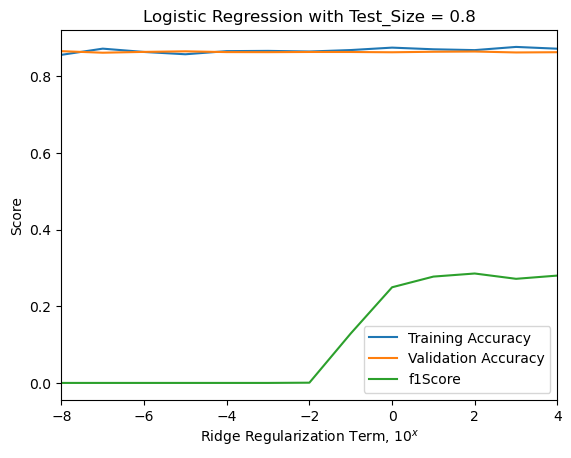

In [33]:
train_acc, val_acc, f1_scores, best_acc, best_lr_model = train_models(X, Y, lr_models, 0.8)
plt.title("Logistic Regression with Test_Size = 0.8")
plt.xlabel(r"Ridge Regularization Term, $10^x$")
plt.ylabel("Score")
plt.xlim([-8, 4])
plt.plot(np.linspace(-8, 4, 13), train_acc, label = 'Training Accuracy')
plt.plot(np.linspace(-8, 4, 13), val_acc, label = 'Validation Accuracy')
plt.plot(np.linspace(-8, 4, 13), f1_scores, label = 'f1Score')
plt.legend()
print(best_acc)

### Training Logistic Regression Models with test_size = 0.5

0.8681333333333333


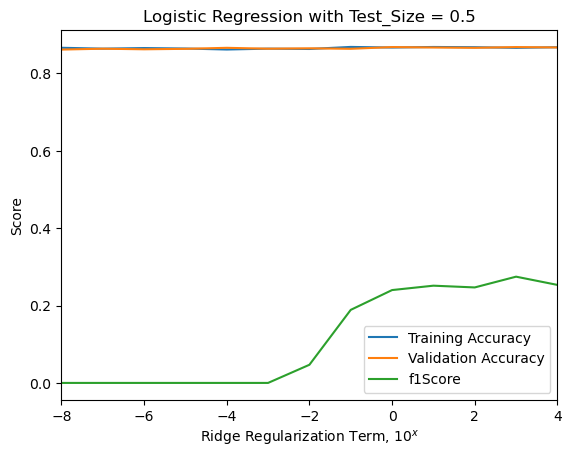

In [34]:
train_acc, val_acc, f1_scores, best_acc, best_lr_model = train_models(X, Y, lr_models, 0.5)
plt.title("Logistic Regression with Test_Size = 0.5")
plt.xlabel(r"Ridge Regularization Term, $10^x$")
plt.ylabel("Score")
plt.xlim([-8, 4])
plt.plot(np.linspace(-8, 4, 13), train_acc, label = 'Training Accuracy')
plt.plot(np.linspace(-8, 4, 13), val_acc, label = 'Validation Accuracy')
plt.plot(np.linspace(-8, 4, 13), f1_scores, label = 'f1Score')
plt.legend()
print(best_acc)

### Training Logistic Regression Models with test_size = 0.2

0.8736666666666667


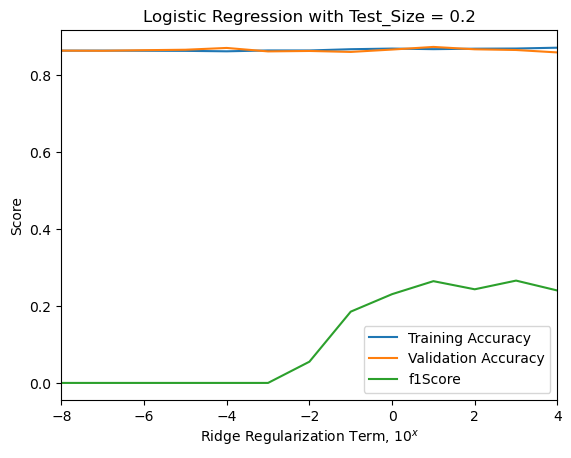

In [35]:
train_acc, val_acc, f1_scores, best_acc, best_lr_model = train_models(X, Y, lr_models, 0.2)
plt.title("Logistic Regression with Test_Size = 0.2")
plt.xlabel(r"Ridge Regularization Term, $10^x$")
plt.ylabel("Score")
plt.xlim([-8, 4])
plt.plot(np.linspace(-8, 4, 13), train_acc, label = 'Training Accuracy')
plt.plot(np.linspace(-8, 4, 13), val_acc, label = 'Validation Accuracy')
plt.plot(np.linspace(-8, 4, 13), f1_scores, label = 'f1Score')
plt.legend()
print(best_acc)

### Training SVM Models with test_size = 0.8

In [36]:
svm_labels = ['Linear', 'Poly2', 'Poly3', 'RBF-.001', 'RBF-.05', 'RBF-1']

0.8658333333333333


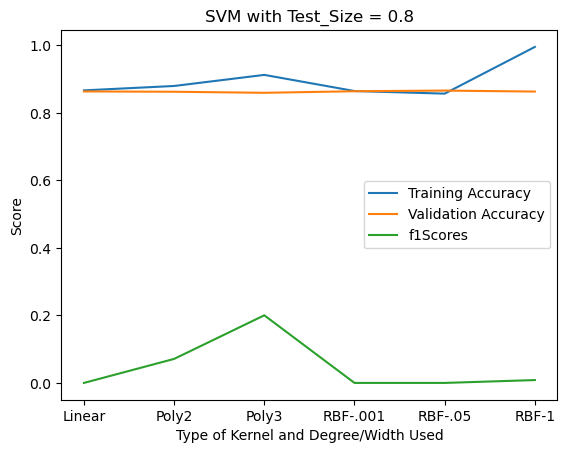

In [37]:
train_acc, val_acc, f1_scores, best_acc, best_svm_model = train_models(X, Y, svm_models, 0.8)
plt.title("SVM with Test_Size = 0.8")
plt.xlabel(r"Type of Kernel and Degree/Width Used")
plt.ylabel("Score")
plt.plot(svm_labels, train_acc, label = "Training Accuracy")
plt.plot(svm_labels, val_acc, label = "Validation Accuracy")
plt.plot(svm_labels, f1_scores, label = "f1Scores")
plt.legend()
print(best_acc)

### Training SVM Models with test_size = 0.5

0.8679333333333332


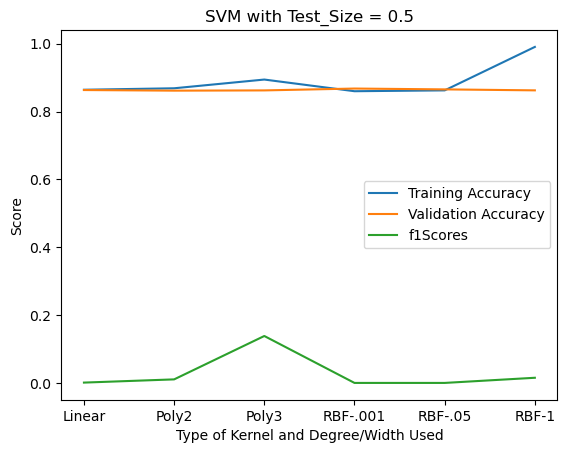

In [38]:
train_acc, val_acc, f1_scores, best_acc, best_svm_model = train_models(X, Y, svm_models, 0.5)
plt.title("SVM with Test_Size = 0.5")
plt.xlabel(r"Type of Kernel and Degree/Width Used")
plt.ylabel("Score")
plt.plot(svm_labels, train_acc, label = "Training Accuracy")
plt.plot(svm_labels, val_acc, label = "Validation Accuracy")
plt.plot(svm_labels, f1_scores, label = "f1Scores")
plt.legend()
print(best_acc)

### Training SVM Models with test_size = 0.2

0.8661666666666666


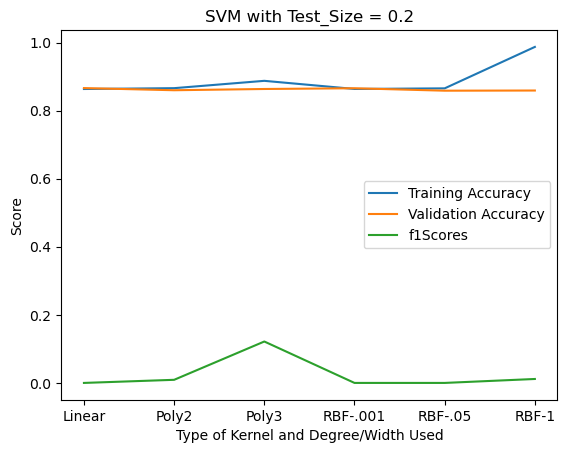

In [39]:
train_acc, val_acc, f1_scores, best_acc, best_svm_model = train_models(X, Y, svm_models, 0.2)
plt.title("SVM with Test_Size = 0.2")
plt.xlabel(r"Type of Kernel and Degree/Width Used")
plt.ylabel("Score")
plt.plot(svm_labels, train_acc, label = "Training Accuracy")
plt.plot(svm_labels, val_acc, label = "Validation Accuracy")
plt.plot(svm_labels, f1_scores, label = "f1Scores")
plt.legend()
print(best_acc)

### Training RF Models with test_size = 0.8

In [40]:
rf_splits = [1, 2, 4, 8, 12, 16, 20]

0.8651249999999999


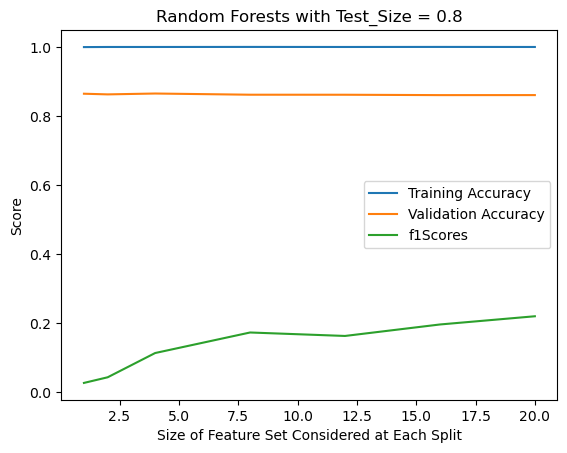

In [41]:
train_acc, val_acc, f1_scores, best_acc, best_rf_model = train_models(X, Y, rf_models, 0.8)
plt.title("Random Forests with Test_Size = 0.8")
plt.xlabel(r"Size of Feature Set Considered at Each Split")
plt.ylabel("Score")
plt.plot(rf_splits, train_acc, label = "Training Accuracy")
plt.plot(rf_splits, val_acc, label = "Validation Accuracy")
plt.plot(rf_splits, f1_scores, label = "f1Scores")
plt.legend()
print(best_acc)

### Training RF Models with test_size = 0.5

0.8619333333333333


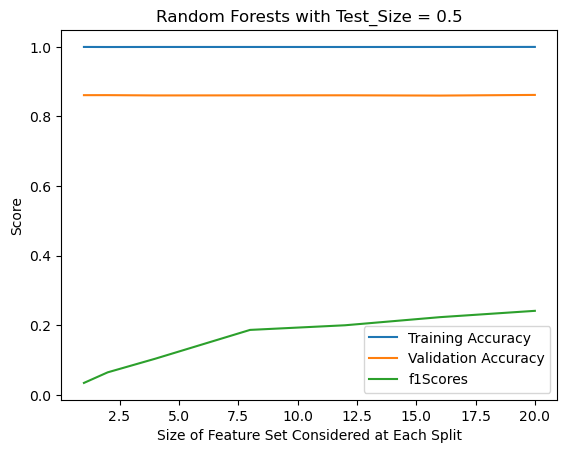

In [42]:
train_acc, val_acc, f1_scores, best_acc, best_rf_model = train_models(X, Y, rf_models, 0.5)
plt.title("Random Forests with Test_Size = 0.5")
plt.xlabel(r"Size of Feature Set Considered at Each Split")
plt.ylabel("Score")
plt.plot(rf_splits, train_acc, label = "Training Accuracy")
plt.plot(rf_splits, val_acc, label = "Validation Accuracy")
plt.plot(rf_splits, f1_scores, label = "f1Scores")
plt.legend()
print(best_acc)

### Training RF Models with test_size = 0.2

0.8681666666666668


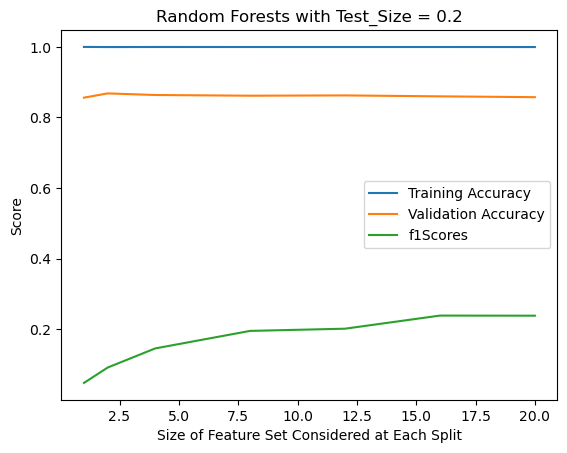

In [43]:
train_acc, val_acc, f1_scores, best_acc, best_rf_model = train_models(X, Y, rf_models, 0.2)
plt.title("Random Forests with Test_Size = 0.2")
plt.xlabel(r"Size of Feature Set Considered at Each Split")
plt.ylabel("Score")
plt.plot(rf_splits, train_acc, label = "Training Accuracy")
plt.plot(rf_splits, val_acc, label = "Validation Accuracy")
plt.plot(rf_splits, f1_scores, label = "f1Scores")
plt.legend()
print(best_acc)

Accuracies:
logistic regression: 0.87
 SVM: 0.865 Random Forests: 0.971
f1Scores:
logistic regression: 0.2441860465116279
 SVM: 0.0 Random Forests: 0.8806584362139918


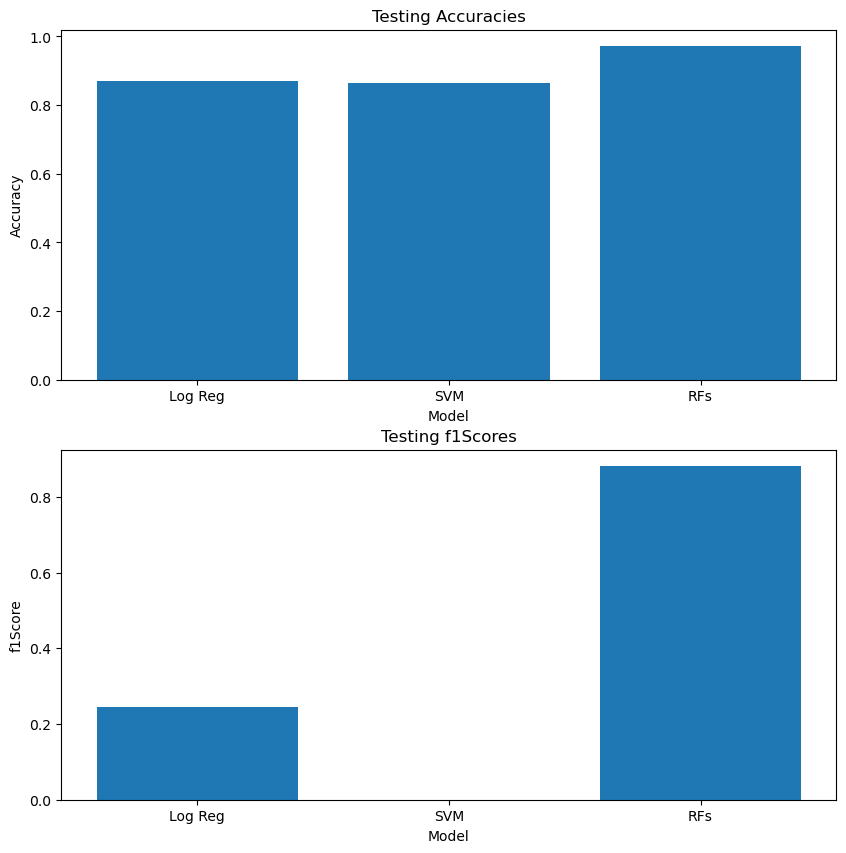

In [44]:
from sklearn.model_selection import train_test_split
_, testX, _, testY = train_test_split(X, Y, test_size = 0.2)
eval_models(best_lr_model, best_svm_model, best_rf_model, testX, testY)